In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('Fraud.csv')

In [ ]:
# print(df)
df.head()
# By doing this we can check and analyse the various columns in the dataset
# df.describe()



In [5]:
df_sample = df.sample(304800)

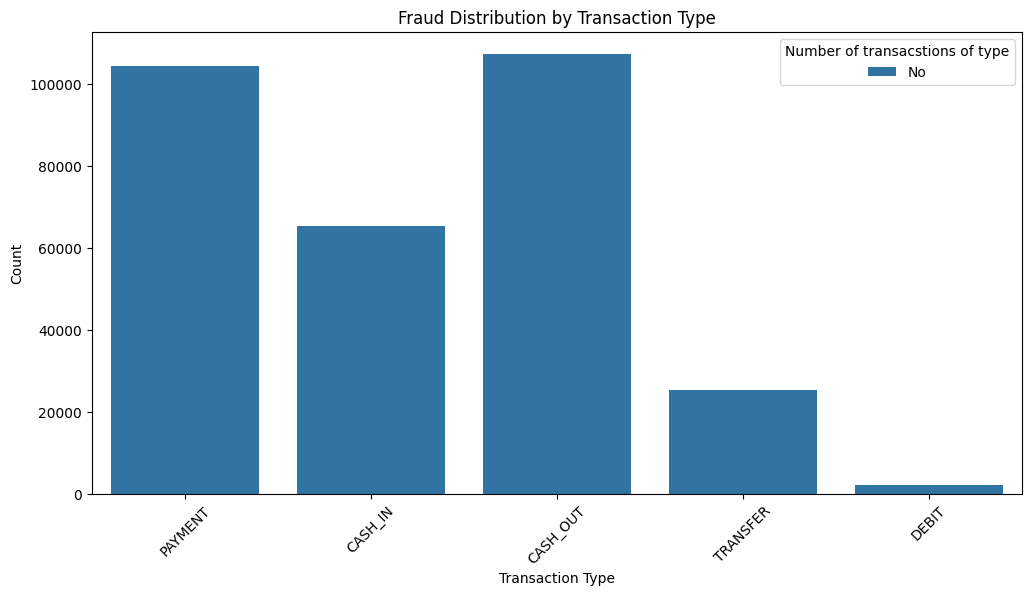

In [130]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df_sample)
plt.title('Fraud Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Number of transacstions of type', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


# Decription of the dataset as per my understanding

* Money of amount is being tranfered by nameOrig to nameDest. Here the two columns seem to be a 15-digit MICR (Magnetic Ink Character Recognition) code.
* oldBalanceOrig is the original account balance of nameOrig before the transaction and newBalanceOrig is the account balance of nameOrig after the transaction.
* newBalanceDest is the account blance of nameDest after the transaction



# My Observation
* In many areas it isunderstandable that the oldBalanceDest is 0 but after payment transfer, the newBalanceDest should not remain NULL. In such a case, it is evident that a fraudulent transaction has taken place.
In the given dataset, 0.0 for non-fraudulent transactions & 1.0 for fraudulent transactions

* Again cases wherein almost all of the money is being transferred may also end up being fraudulent.

* In first and second the newBalanceDest is not changing even after such a huge payemnt.
This might be because the M stands for a merchant accoun that does't hold balances, instead immediately transferring received funds elsewhere.

 --OR--

 This has been done to reduce the false positives.
So,
1. Payment: sending money to a merchant or service provider
2. moving money from one personal account to another
3. Cash In: money being added to an account
4. Cash Out: money being withdrawn from an accoun


In [7]:
# Data cleaning
df_sample['amount'].fillna(df_sample['amount'].mean(), inplace=True)
df_sample['oldbalanceOrg'].fillna(df_sample['oldbalanceOrg'].mean(), inplace=True)
df_sample['newbalanceOrig'].fillna(df_sample['newbalanceOrig'].mean(), inplace=True)
df_sample['oldbalanceDest'].fillna(df_sample['oldbalanceDest'].mean(), inplace=True)
df_sample['newbalanceDest'].fillna(df_sample['newbalanceDest'].mean(), inplace=True)
df_sample['isFraud'].fillna(df_sample['isFraud'].mean(), inplace=True)
df_sample['isFlaggedFraud'].fillna(df_sample['isFlaggedFraud'].mean(), inplace=True)

<ipython-input-7-67381a55afcf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample['amount'].fillna(df_sample['amount'].mean(), inplace=True)
<ipython-input-7-67381a55afcf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# Working on outliers
from scipy.stats import zscore

DataFrame after removing outliers:


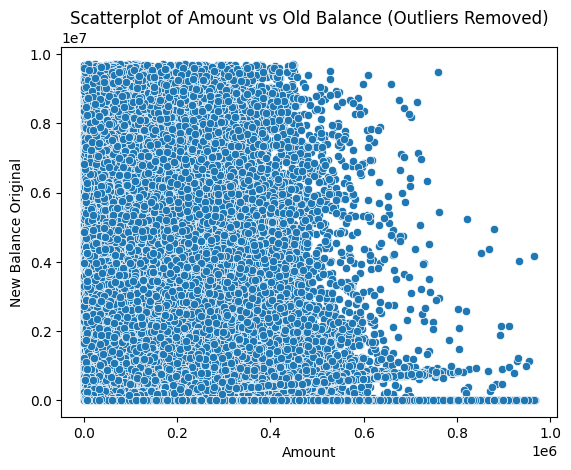

         Variable       VIF
0           const  1.776437
1          amount  1.002691
2  newbalanceOrig  1.002691


In [20]:
df_sample['z_score_amount'] = zscore(df_sample['amount'])
df_sample['z_score_newbalance'] = zscore(df_sample['newbalanceOrig'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_amount'].abs() <= threshold) &
                       (df_sample['z_score_newbalance'].abs() <= threshold)]
print("DataFrame after removing outliers:")
# to visualize the cleaned data
sns.scatterplot(data=df_cleaned, x='amount', y='newbalanceOrig')
plt.title("Scatterplot of Amount vs Old Balance (Outliers Removed)")
plt.xlabel("Amount")
plt.ylabel("New Balance Original")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['amount', 'newbalanceOrig']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

DataFrame after removing outliers:


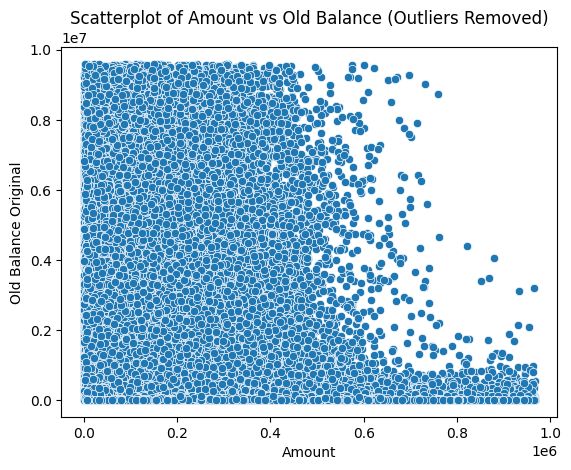

        Variable       VIF
0          const  1.778290
1         amount  1.001857
2  oldbalanceOrg  1.001857


In [19]:
df_sample['z_score_amount'] = zscore(df_sample['amount'])
df_sample['z_score_oldbalance'] = zscore(df_sample['oldbalanceOrg'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_amount'].abs() <= threshold) &
                       (df_sample['z_score_oldbalance'].abs() <= threshold)]
print("DataFrame after removing outliers:")
# to visualize the cleaned data
sns.scatterplot(data=df_cleaned, x='amount', y='oldbalanceOrg')
plt.title("Scatterplot of Amount vs Old Balance (Outliers Removed)")
plt.xlabel("Amount")
plt.ylabel("Old Balance Original")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['amount', 'oldbalanceOrg']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

DataFrame after removing outliers:


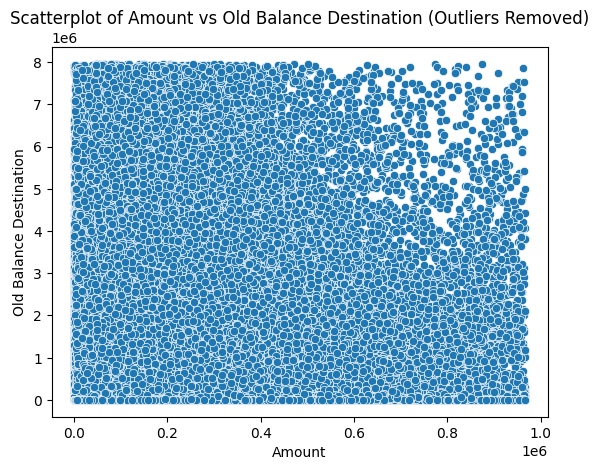

         Variable       VIF
0           const  1.794555
1          amount  1.096333
2  oldbalanceDest  1.096333


In [18]:
df_sample['z_score_amount'] = zscore(df_sample['amount'])
df_sample['z_score_oldbalanceDest'] = zscore(df_sample['oldbalanceDest'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_amount'].abs() <= threshold) &
                       (df_sample['z_score_oldbalanceDest'].abs() <= threshold)]
print("DataFrame after removing outliers:")
# to visualize the cleaned data
sns.scatterplot(data=df_cleaned, x='amount', y='oldbalanceDest')
plt.title("Scatterplot of Amount vs Old Balance Destination (Outliers Removed)")
plt.xlabel("Amount")
plt.ylabel("Old Balance Destination")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['amount', 'oldbalanceDest']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


In the case below, the VIF value before removal of multicoliniarity came up to 128 and the correlation matrix gace values like 0.99 and 1.00 which are very close to 1 indicating HIGH multicoliniarity.

We ave removed newbalanceOrig

DataFrame after removing outliers:


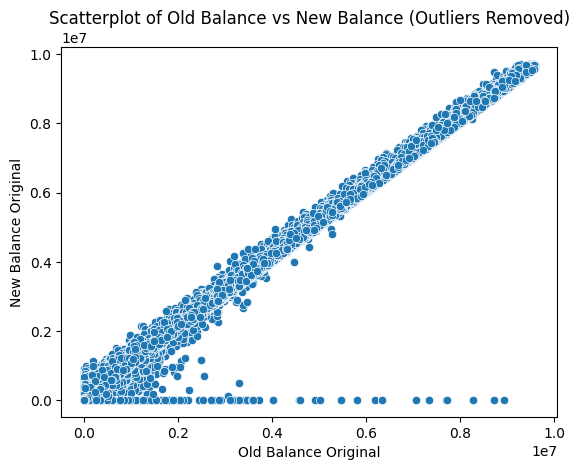

Initial VIF values:
         Variable       VIF
0           const  1.363342
1   oldbalanceOrg  1.016145
2  oldbalanceDest  1.016145

Columns retained after addressing multicollinearity:
['oldbalanceDest', 'oldbalanceOrg']

DataFrame after multicollinearity removal:
         oldbalanceDest  oldbalanceOrg
1501659            0.00       30884.00
207709             0.00           0.00
6133               0.00        1354.92
30454              0.00           0.00
1046717       349616.69           0.00


In [17]:
df_sample['z_score_oldbalanceOrg'] = zscore(df_sample['oldbalanceOrg'])
df_sample['z_score_newbalanceOrig'] = zscore(df_sample['newbalanceOrig'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_oldbalanceOrg'].abs() <= threshold) &
                       (df_sample['z_score_newbalanceOrig'].abs() <= threshold)]

print("DataFrame after removing outliers:")
# to visualize the cleaned data
sns.scatterplot(data=df_cleaned, x='oldbalanceOrg', y='newbalanceOrig')
plt.title("Scatterplot of Old Balance vs New Balance (Outliers Removed)")
plt.xlabel("Old Balance Original")
plt.ylabel("New Balance Original")
plt.show()
# Calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate initial VIF values
vif_data = calculate_vif(X)
print("Initial VIF values:")
print(vif_data)

# Step 4: Remove multicollinearity
vif_threshold = 10  # Set your threshold for VIF
while True:
    # Check if any VIF exceeds the threshold
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        # Find the variable with the highest VIF
        variable_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        print(f"Removing variable '{variable_to_remove}' with VIF: {max_vif}")

        # Remove this variable from the dataset
        X = X.drop(columns=[variable_to_remove])

        # Recalculate VIF
        vif_data = calculate_vif(X)
    else:
        break  # Exit the loop if all VIFs are acceptable

# Step 5: Define unique columns to keep based on VIF results
columns_to_keep = list(set(vif_data['Variable']).intersection(df_cleaned.columns))

# Update df_cleaned to include only the cleaned variables
df_cleaned_reduced = df_cleaned[columns_to_keep].copy()

# Verify and display the remaining columns
print("\nColumns retained after addressing multicollinearity:")
print(columns_to_keep)
print("\nDataFrame after multicollinearity removal:")
print(df_cleaned_reduced.head())

DataFrame after removing outliers:


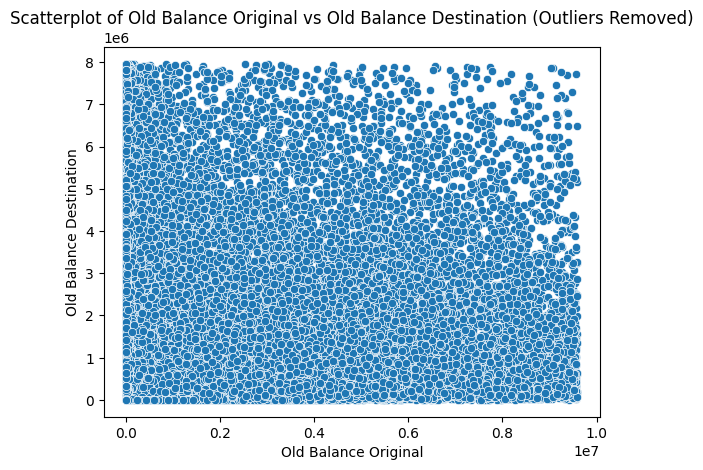

         Variable       VIF
0           const  1.363342
1   oldbalanceOrg  1.016145
2  oldbalanceDest  1.016145


In [16]:
df_sample['z_score_oldbalanceOrg'] = zscore(df_sample['oldbalanceOrg'])
df_sample['z_score_oldbalanceDest'] = zscore(df_sample['oldbalanceDest'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_oldbalanceOrg'].abs() <= threshold) &
                       (df_sample['z_score_oldbalanceDest'].abs() <= threshold)]
print("DataFrame after removing outliers:")
# to visualise the cleaned data
sns.scatterplot(data=df_cleaned, x='oldbalanceOrg', y='oldbalanceDest')
plt.title("Scatterplot of Old Balance Original vs Old Balance Destination (Outliers Removed)")
plt.xlabel("Old Balance Original")
plt.ylabel("Old Balance Destination")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['oldbalanceOrg', 'oldbalanceDest']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In the below cell, we have remved oldbalanceDest column

DataFrame after removing outliers:


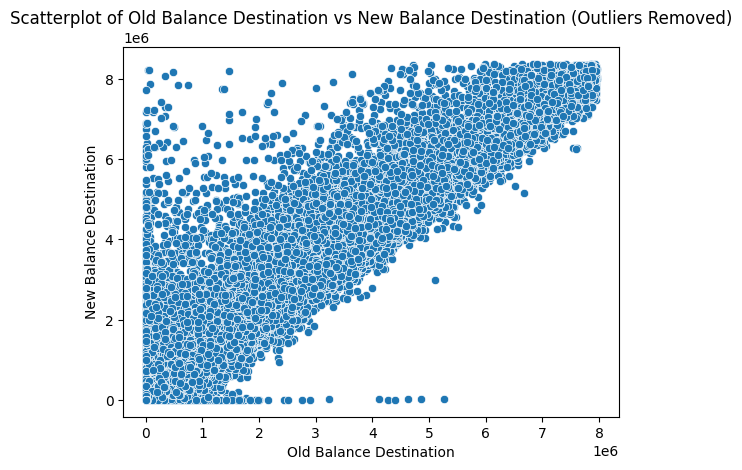

         Variable        VIF
0           const   1.361868
1  oldbalanceDest  16.066451
2  newbalanceDest  16.066451
Removing newbalanceDest with VIF 16.066451099082524

Columns retained after removing multicollinearity:
['oldbalanceDest']

Columns retained after removing multicollinearity:
['oldbalanceDest']

New correlation matrix after removing multicollinearity:
                oldbalanceDest
oldbalanceDest             1.0


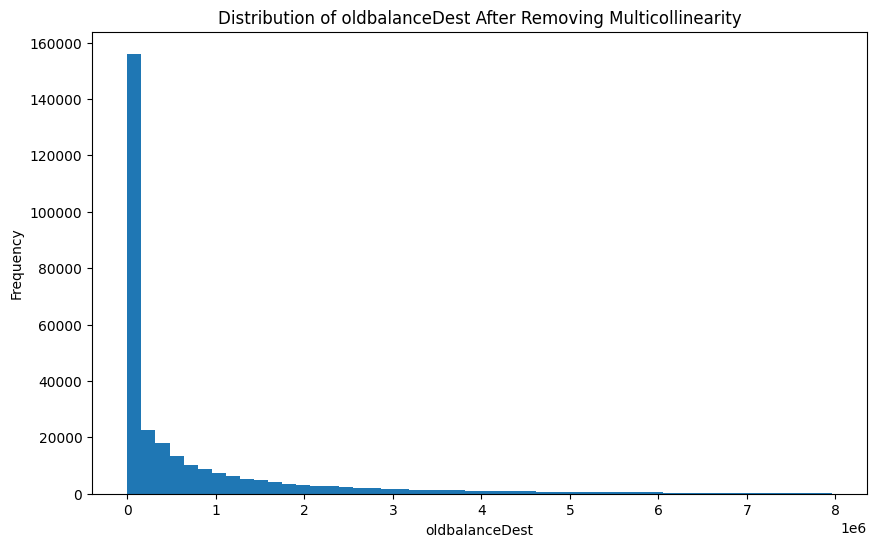

In [15]:
df_sample['z_score_oldbalanceDest'] = zscore(df_sample['oldbalanceDest'])
df_sample['z_score_newbalanceDest'] = zscore(df_sample['newbalanceDest'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_oldbalanceDest'].abs() <= threshold) &
                       (df_sample['z_score_newbalanceDest'].abs() <= threshold)]
print("DataFrame after removing outliers:")
# to visualise the cleaned data
sns.scatterplot(data=df_cleaned, x='oldbalanceDest', y='newbalanceDest')
plt.title("Scatterplot of Old Balance Destination vs New Balance Destination (Outliers Removed)")
plt.xlabel("Old Balance Destination")
plt.ylabel("New Balance Destination")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['oldbalanceDest', 'newbalanceDest']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# here also we see a high vif value which is baove 5 which means there exists multicolinearrity
vif_threshold = 5
columns_to_keep = X.columns.tolist()
for _ in range(len(columns_to_keep)):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X[columns_to_keep].columns
    vif_data["VIF"] = [variance_inflation_factor(X[columns_to_keep].values, i) for i in range(X[columns_to_keep].shape[1])]
    max_vif = vif_data['VIF'].max()
    if max_vif > vif_threshold:
        exclude_feature = vif_data.loc[vif_data['VIF'] == max_vif, 'Variable'].values[0]
        if exclude_feature != 'const':  # Avoid removing the constant term
            columns_to_keep.remove(exclude_feature)
            print(f"Removing {exclude_feature} with VIF {max_vif}")
    else:
        break
if 'const' in columns_to_keep:
    columns_to_keep.remove('const')

# Final dataset without multicollinearity
df_no_multicollinearity2 = df_cleaned[columns_to_keep]
# to copy the columns after removal of multicoliniarity into the dataset without duplication
columns_to_keep = list(set(vif_data['Variable']).intersection(df_cleaned.columns))

print("\nColumns retained after removing multicollinearity:")
print(columns_to_keep)
# Final dataset without multicollinearity
df_no_multicollinearity2 = df_cleaned[columns_to_keep]

print("\nColumns retained after removing multicollinearity:")
print(columns_to_keep)

# Recalculate correlation matrix for the remaining variables
new_correlation = df_no_multicollinearity2.corr()
print("\nNew correlation matrix after removing multicollinearity:")
print(new_correlation)

# Visualize the remaining data
if len(columns_to_keep) >= 2:
    sns.scatterplot(data=df_no_multicollinearity2, x=columns_to_keep[0], y=columns_to_keep[1])
    plt.title("Scatterplot after Removing Multicollinearity")
    plt.xlabel(columns_to_keep[0])
    plt.ylabel(columns_to_keep[1])
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.hist(df_no_multicollinearity2[columns_to_keep[0]], bins=50)
    plt.title(f"Distribution of {columns_to_keep[0]} After Removing Multicollinearity")
    plt.xlabel(columns_to_keep[0])
    plt.ylabel("Frequency")
    plt.show()


DataFrame after removing outliers:


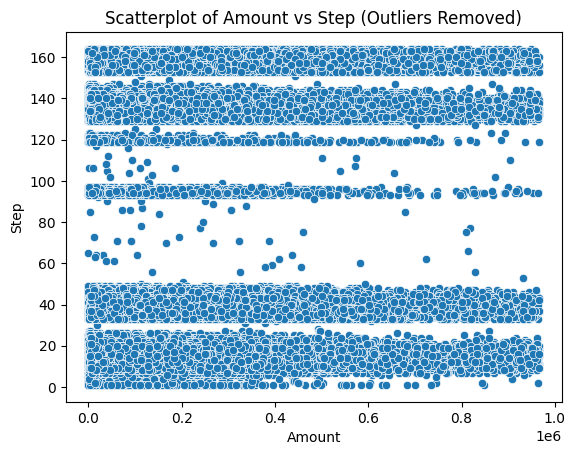

  Variable       VIF
0    const  3.382895
1   amount  1.000173
2     step  1.000173


In [14]:
df_sample['z_score_amount'] = zscore(df_sample['amount'])
df_sample['z_score_step'] = zscore(df_sample['step'])
threshold = 3
df_cleaned = df_sample[(df_sample['z_score_amount'].abs() <= threshold) &
                       (df_sample['z_score_step'].abs() <= threshold)]
# creating a new csv file with cleaned data
print("DataFrame after removing outliers:")
sns.scatterplot(data=df_cleaned, x='amount', y='step')
plt.title("Scatterplot of Amount vs Step (Outliers Removed)")
plt.xlabel("Amount")
plt.ylabel("Step")
plt.show()
# Calculating variance inflation factor
X = df_cleaned[['amount', 'step']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [13]:
# reducing multicolinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7cbea2462830> (for post_execute):


KeyboardInterrupt: 

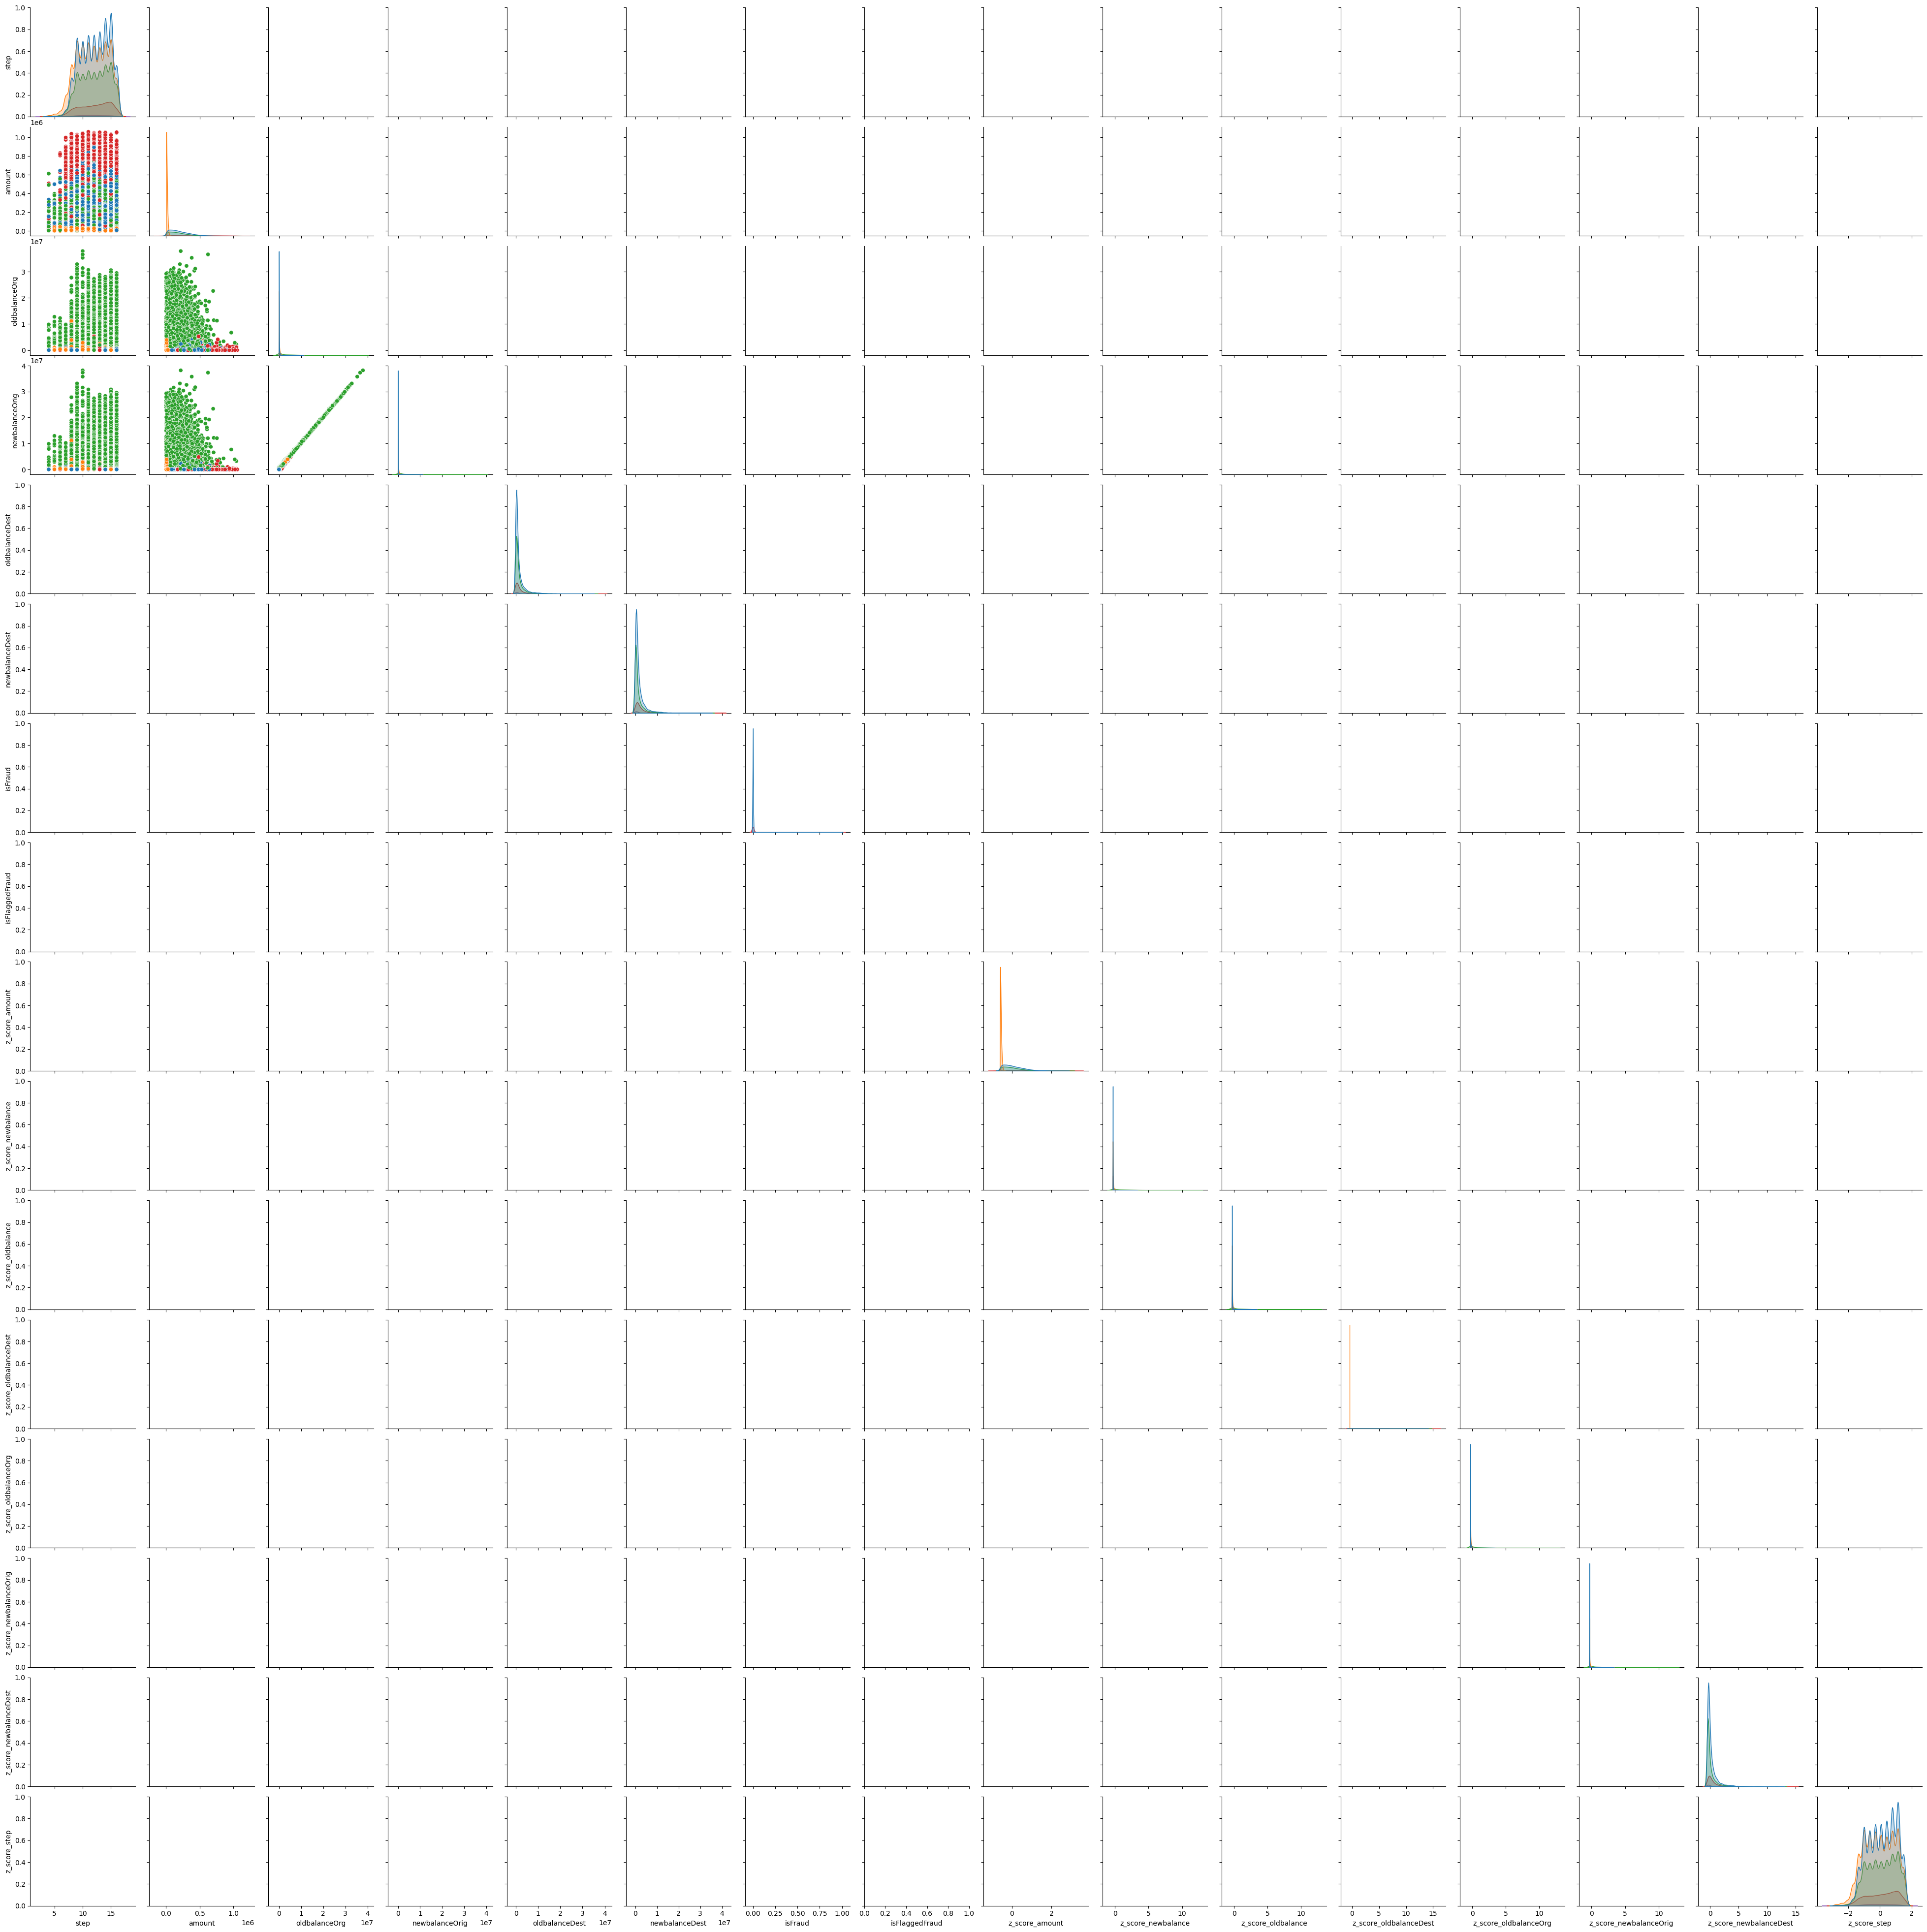

In [85]:
# to visualise multicolinearity which is evident by the strong linear relationships shown
sns.pairplot(df_cleaned,diag_kind='kde', hue='type')
plt.show()

In [142]:
print(df_cleaned.head())

        step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
68288      9  PAYMENT   21033.92   C834815380           0.00            0.00   
264667    15  PAYMENT    8578.20   C851824247        8390.04            0.00   
286204    15  CASH_IN  300042.66   C639262379     2287839.44      2587882.10   
266126    15  PAYMENT    9933.63  C1378140011       14510.00         4576.37   
17891      8  CASH_IN   12567.80   C908213766     5320523.45      5333091.25   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
68288   M1983832482             0.0            0.00      0.0             0.0   
264667  M1208313416             0.0            0.00      0.0             0.0   
286204  C1281855264       5040279.2      4304554.29      0.0             0.0   
266126  M1739022469             0.0            0.00      0.0             0.0   
17891    C146155266         13535.0            0.00      0.0             0.0   

        z_score_amount  z_score_newbal

In [22]:
df_cleaned_reduced = df_cleaned[columns_to_keep].copy()
print(df_cleaned_reduced.head())

         oldbalanceDest  oldbalanceOrg
1501659            0.00       30884.00
207709             0.00           0.00
6133               0.00        1354.92
30454              0.00           0.00
1046717       349616.69           0.00


since oldBalanceDest and newBalanceDest show high multicolliniarity and since both columns are necessary, instead of dropping the columns, taking average of both columns.
Similarly for oldbalanceOrg and newbalanceOrig


In [23]:
df_cleaned['averagebalanceDest'] = (df_cleaned['oldbalanceDest'] + df_cleaned['newbalanceDest']) / 2
print(df_cleaned.head())

         step      type     amount     nameOrig  oldbalanceOrg  \
1501659   143   PAYMENT   16518.79  C1476571566       30884.00   
207709     13   PAYMENT   13178.11   C461425253           0.00   
6133        6   PAYMENT    1942.26   C956934228        1354.92   
30454       8   PAYMENT   27161.90   C858815411           0.00   
1046717    95  CASH_OUT  186843.88   C730699796           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1501659        14365.21   M846936974            0.00            0.00      0.0   
207709             0.00    M69977798            0.00            0.00      0.0   
6133               0.00  M2071551415            0.00            0.00      0.0   
30454              0.00   M247395591            0.00            0.00      0.0   
1046717            0.00  C1973924720       349616.69       536460.57      0.0   

         isFlaggedFraud  z_score_amount  z_score_oldbalance  \
1501659             0.0       -0.540499           -0.

<ipython-input-23-ed9162f5037d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['averagebalanceDest'] = (df_cleaned['oldbalanceDest'] + df_cleaned['newbalanceDest']) / 2


In [25]:
df_cleaned['averagebalanceOrg'] = (df_cleaned['oldbalanceOrg'] + df_cleaned['newbalanceOrig']) / 2
print(df_cleaned.head())

         step      type     amount     nameOrig  oldbalanceOrg  \
1501659   143   PAYMENT   16518.79  C1476571566       30884.00   
207709     13   PAYMENT   13178.11   C461425253           0.00   
6133        6   PAYMENT    1942.26   C956934228        1354.92   
30454       8   PAYMENT   27161.90   C858815411           0.00   
1046717    95  CASH_OUT  186843.88   C730699796           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
1501659        14365.21   M846936974            0.00            0.00      0.0   
207709             0.00    M69977798            0.00            0.00      0.0   
6133               0.00  M2071551415            0.00            0.00      0.0   
30454              0.00   M247395591            0.00            0.00      0.0   
1046717            0.00  C1973924720       349616.69       536460.57      0.0   

         ...  z_score_amount  z_score_oldbalance  z_score_newbalance  \
1501659  ...       -0.540499           -0.28

<ipython-input-25-8c04e93a0e36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['averagebalanceOrg'] = (df_cleaned['oldbalanceOrg'] + df_cleaned['newbalanceOrig']) / 2


In [148]:
# df_cleaned.to_csv('cleaned_fraud.csv', index=False)

In [149]:
# Keeping only necessary columns ie step,type, amount, averagebalanceOrg, averagebalanceDest, isFraud, isFlaggedFraud

In [26]:
columns_to_keep_fraud = ['step', 'type', 'amount', 'averagebalanceOrg', 'averagebalanceDest', 'isFraud', 'isFlaggedFraud']
df_cleaned_reduced = df_cleaned[columns_to_keep_fraud].copy()

# df_cleaned_reduced.to_csv('cleaned_fraud_reduced.csv', index=False)


In [27]:
df_cleaned_reduced= pd.read_csv('cleaned_fraud_reduced.csv')
df_cleaned_reduced.head(20)

,step,type,amount,averagebalanceOrg,averagebalanceDest,isFraud,isFlaggedFraud
0,15,CASH_OUT,128473.62,64236.810,64236.810,1.0,0
1,15,CASH_OUT,696763.08,348381.540,856594.195,1.0,0
2,15,CASH_OUT,39713.28,0.000,1294723.150,1.0,0
3,6,CASH_OUT,33332.86,16666.430,15501.000,1.0,0
4,7,TRANSFER,441445.58,220722.790,0.000,1.0,0
5,6,TRANSFER,17246.00,8623.000,50858.920,1.0,0
6,6,TRANSFER,13704.00,6852.000,829373.045,1.0,0
7,9,TRANSFER,21922.00,10961.000,0.000,1.0,0
8,7,CASH_OUT,262434.54,131217.270,228879.825,1.0,0
9,11,TRANSFER,12461.00,6230.500,0.000,1.0,0


# **Variables**

* For my model, the target variable is 'isFraud' since it determines wether a transaction was fraudulent or not.

* 'isFlaggedFraud' can just be used as a supporting variable while accessing the effectiveness of the system that is being used as it is only based on the quality of transaction and not on the quantity. The sytem flags all transactions over a threshhold value.

In [112]:
# Check the distribution of the target variable in training data
print("Unique classes in y_train:", y_train.unique())
print("Counts in y_train:\n", y_train.value_counts())
# After splitting into majority and minority classes
print("Unique classes in y_minority:", y_minority.unique())
print("Counts in y_minority:\n", y_minority.value_counts())

Unique classes in y_train: [0. 1.]
Counts in y_train:
 isFraud
0.0    50625
1.0       23
Name: count, dtype: int64
Unique classes in y_minority: [1.]
Counts in y_minority:
 isFraud
1.0    23
Name: count, dtype: int64


We can observe that we only have 42 for fraud and 80994 for notfraud. Hence the model is prone to overfitting.

Solution- creating sythetic data.

# **Logistic Regression**
So here we observe that our dataset is not balanced. It has a bajority of 0s and a minority of 1s(actual fraudulent cases) because of which our model is overfitting to the positive data since it is in majority.

To solve this (when train_test_split was 0.2) I tried to balance the weights which has led to a hige drop in the accuracy of the model. It went from 0.998(overfit) to 0.6.

Since the data is not balanced, I will now either create synthetic data for the fraud cases to balance the model and to prevent overfitting & just use a different model which works better with unbalanced datasets.

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [96]:
df_cleaned_reduced['isFraud'] = df_cleaned_reduced['isFraud'].apply(lambda x: 0 if x not in [0, 1] else x)

# **Setting the training and testing split, calibrations and validations**


In [120]:
from sklearn.model_selection import train_test_split
X = df_cleaned_reduced.drop(columns=['isFraud','type'])
y = df_cleaned_reduced['isFraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_calibration, X_val, y_calibration, y_val = train_test_split(X_train, y_train, test_size=0.214285, random_state=42, stratify=y_train)

In [121]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6013031030965151
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75     30375
         1.0       0.00      0.79      0.00        14

    accuracy                           0.60     30389
   macro avg       0.50      0.69      0.38     30389
weighted avg       1.00      0.60      0.75     30389



# **Random Forest**


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

Below is the accuracy of random forest before adding synthetic data.

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6013031030965151
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75     30375
         1.0       0.00      0.79      0.00        14

    accuracy                           0.60     30389
   macro avg       0.50      0.69      0.38     30389
weighted avg       1.00      0.60      0.75     30389



To approach the issue of imbalance I have considered 49 tuples of non-fraudulent cases and 48 for fraud.

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Assuming you have already split your data into X_train and y_train
print("Counts in y_train:")
print(y_train.value_counts())

# Prepare majority and minority datasets
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]

# Check counts
print("Counts in y_majority:", y_majority.value_counts())
print("Counts in y_minority:", y_minority.value_counts())

# Randomly sample 49 from majority and 48 from minority
X_majority_sampled = X_majority.sample(n=49, random_state=42)
y_majority_sampled = y_majority.sample(n=49, random_state=42)

# Combine sampled majority and minority datasets
X_combined = pd.concat([X_majority_sampled, X_minority])
y_combined = pd.concat([y_majority_sampled, y_minority])

# Apply SMOTE to the combined dataset
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_combined, y_combined)

# Fit the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Counts in y_train:
isFraud
0.0    70875
1.0       32
Name: count, dtype: int64
Counts in y_majority: isFraud
0.0    70875
Name: count, dtype: int64
Counts in y_minority: isFraud
1.0    32
Name: count, dtype: int64
Accuracy: 0.81723650004936
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90     30375
         1.0       0.00      0.79      0.00        14

    accuracy                           0.82     30389
   macro avg       0.50      0.80      0.45     30389
weighted avg       1.00      0.82      0.90     30389



In [125]:
# converting catagorical columns to base form using one hot encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)
# Assuming X_train is your feature DataFrame
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
# Repeat for the minority and majority sets if necessary
X_majority_encoded = pd.get_dummies(X_majority, columns=categorical_cols, drop_first=True)
X_minority_encoded = pd.get_dummies(X_minority, columns=categorical_cols, drop_first=True)


Categorical Columns: Index([], dtype='object')


# **Short-comings and reason for low precision**

The given dataset is severly imbalanced because of which the precision comes out to be 0. This requires us to manually change the data and modify it.

# **Key Factors involved in fraud transactions**

* Huge amounts of money being transferred.
* The type of transactions bein made also matters. Withdawal of cash or international transfers correlate with fraud.

# **Prevention methodologies**
* Historical transaction data will thus help explain what might make the correlation between such transactions and fraud. Models can then be established in order to identify patterns quite typical of fraudulent transactions-these might include frequent large cash withdrawals or a spike in international transfers from a specific account.

* By incorporating the above listed factors into predictive models, financial institutions can assess the likelihood of a transaction being fraudulent based on the amount and type of transaction relative to the customer's typical behavior and historical data.

# **To verify if the above listed methodologies work**

* By checking the F1 score and using the Accuracy Precision matrix

* We can check the financial impact of fraudulent transactions both before and after implementing the fraud detection measures. A decrease in financial losses due to fraud indicates improved effectiveness.

* Constantly reviewing and analysing the system's decisions to ensure it is functioning correctly and adjusting to new fraud patterns.

* Collect feedback from customers regarding their experience with transaction approvals/denials or fraud that they have come accross.